In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, mean_squared_error
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#libraries to help visualize data
import matplotlib.pyplot as plt

#libraries to shuffle image data
import os #used to change directories and make directories
import shutil #used to move image samples from directories
import random #used to shuffle samples
import glob

#import another python file we created

In [3]:
type_1 = ["Bug", "Dark", "Dragon", "Electric", "Fairy", "Fighting", "Fire", "Flying", "Ghost", "Grass", "Ground", "Ice", "Normal", "Poison", "Psychic", "Rock", "Steel", "Water"]
type_2 = ["Bug", "Dark", "Dragon", "Electric", "Fairy", "Fighting", "Fire", "Flying", "Ghost", "Grass", "Ground", "Ice", "None", "Normal", "Poison", "Psychic", "Rock", "Steel", "Water"]

In [4]:
#For the first type water is the largest with 803 files
train_type1 = "CSCI4931_DLFinal-main/Dataset/type1_sorted/train"
test_type1 = "CSCI4931_DLFinal-main/Dataset/type1_sorted/test"

#For the second type none is the largest with 3,649 files
train_type2 = "CSCI4931_DLFinal-main/Dataset/type2_sorted/train"
test_type2 = "CSCI4931_DLFinal-main/Dataset/type2_sorted/test"

In [5]:
# #read in csv file that has number of files in each folder
num_files = pd.read_csv("Num_Types.csv")
# print(num_files["Type1"].loc[0:5])
type1_num = num_files["Type1"]
type2_num = num_files["Type2"] 

# #threshold number to reach when oversampling (only works for 2 model multilabel classification, need to modify if using one model w/ sigmoid)
type1_total = 850
type2_total = 3700

In [180]:
#do image data augmentation to oversample?: https://www.marktechpost.com/2021/04/05/image-data-augmentation-in-keras/
#oversample the data for each train folder
#ONLY RUN THIS CELL ONCE
os.mkdir(train_type1 + "/temp/")

temp_path = train_type1 + "/temp/"

#random oversampling of Pokemon's primary type 
#same process for each type where random sampling of images is generated and moved into specified folder
#process needs to be done so that there are equal distribution of data

#random oversampling for type Bug
bug_needed = type1_total - type1_num.loc[0]
for i in range(0, bug_needed):
    img = random.sample(glob.glob(train_type1 + "/Bug/*"), 1) #only chooses images from bug folder
    parsedString = img[0].split('.')
#     print(parsedString)
    img_name = parsedString[0].split("\\")
#     print(img_name)
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1] #want to save duplicates in separate folder, don't want random sample to choose out of bigger pool that includes duplicates
    #also need to rename duplicates so that they can be saved in the same folder 
#     print(new_img)
    shutil.copy(img[0], new_img) #copy duplicate to temp folder

#https://www.geeksforgeeks.org/how-to-iterate-over-files-in-directory-using-python/
#https://www.tutorialspoint.com/How-to-move-a-file-from-one-folder-to-another-using-Python
dest_folder = train_type1 + "/Bug/"
for dup in os.listdir(temp_path): #iterate through the list of files in the directory chosen
    img_path = os.path.join(temp_path, dup) #combine file name and folder path to create absolute path to file
    if os.path.isfile(img_path): #check if the path is a regular file (not a folder)
#         print(img_path)
        shutil.move(img_path, dest_folder) #move duplicates to designated class/type
    
#random oversampling for type Dark
dark_needed = type1_total - type1_num.loc[1]
for i in range(0, dark_needed):
    img = random.sample(glob.glob(train_type1 + "/Dark/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Dark/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Dragon
dragon_needed = type1_total - type1_num.loc[2]
for i in range(0, dragon_needed):
    img = random.sample(glob.glob(train_type1 + "/Dragon/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Dragon/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Electric
electric_needed = type1_total - type1_num.loc[3]
for i in range(0, electric_needed):
    img = random.sample(glob.glob(train_type1 + "/Electric/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Electric/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Fairy
fairy_needed = type1_total - type1_num.loc[4]
for i in range(0, fairy_needed):
    img = random.sample(glob.glob(train_type1 + "/Fairy/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Fairy/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)
    
#random oversampling for type Fighting
fighting_needed = type1_total - type1_num.loc[5]
for i in range(0, fighting_needed):
    img = random.sample(glob.glob(train_type1 + "/Fighting/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Fighting/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Fire
fire_needed = type1_total - type1_num.loc[6]
for i in range(0, fire_needed):
    img = random.sample(glob.glob(train_type1 + "/Fire/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Fire/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Flying
flying_needed = type1_total - type1_num.loc[7]
for i in range(0, flying_needed):
    img = random.sample(glob.glob(train_type1 + "/Flying/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Flying/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Ghost
ghost_needed = type1_total - type1_num.loc[8]
for i in range(0, ghost_needed):
    img = random.sample(glob.glob(train_type1 + "/Ghost/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Ghost/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Grass
grass_needed = type1_total - type1_num.loc[9]
for i in range(0, grass_needed):
    img = random.sample(glob.glob(train_type1 + "/Grass/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Grass/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Ground
ground_needed = type1_total - type1_num.loc[10]
for i in range(0, ground_needed):
    img = random.sample(glob.glob(train_type1 + "/Ground/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Ground/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Ice
ice_needed = type1_total - type1_num.loc[11]
for i in range(0, ice_needed):
    img = random.sample(glob.glob(train_type1 + "/Ice/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Ice/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Normal
normal_needed = type1_total - type1_num.loc[13]
for i in range(0, normal_needed):
    img = random.sample(glob.glob(train_type1 + "/Normal/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Normal/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Poison
poison_needed = type1_total - type1_num.loc[14]
for i in range(0, poison_needed):
    img = random.sample(glob.glob(train_type1 + "/Poison/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Poison/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Pyschic
psychic_needed = type1_total - type1_num.loc[15]
for i in range(0, psychic_needed):
    img = random.sample(glob.glob(train_type1 + "/Psychic/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Psychic/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)
    
#random oversampling for type Rock
rock_needed = type1_total - type1_num.loc[16]
for i in range(0, rock_needed):
    img = random.sample(glob.glob(train_type1 + "/Rock/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Rock/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Steel
steel_needed = type1_total - type1_num.loc[17]
for i in range(0, steel_needed):
    img = random.sample(glob.glob(train_type1 + "/Steel/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Steel/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Water
water_needed = type1_total - type1_num.loc[18]
for i in range(0, water_needed):
    img = random.sample(glob.glob(train_type1 + "/Water/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Water/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

os.rmdir(temp_path)

In [207]:
#ONLY RUN THIS CELL ONCE
#random oversampling for Pokemon's secondary type
os.mkdir(train_type2 + "/temp/")

temp_path = train_type2 + "/temp/"

#random oversampling for type Bug
bug_needed = type2_total - type2_num.loc[0]
for i in range(0, bug_needed):
    img = random.sample(glob.glob(train_type2 + "/Bug/*"), 1) #only chooses images from bug folder
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1] #want to save duplicates in separate folder, don't want random sample to choose out of bigger pool that includes duplicates
    #also need to rename duplicates so that they can be saved in the same folder 
    shutil.copy(img[0], new_img) #copy duplicate to temp folder

dest_folder = train_type2 + "/Bug/"
for dup in os.listdir(temp_path): #iterate through the list of files in the directory chosen
    img_path = os.path.join(temp_path, dup) #combine file name and folder path to create absolute path to file
    if os.path.isfile(img_path): #check if the path is a regular file (not a folder)
        shutil.move(img_path, dest_folder) #move duplicates to designated class/type
    
#random oversampling for type Dark
dark_needed = type2_total - type2_num.loc[1]
for i in range(0, dark_needed):
    img = random.sample(glob.glob(train_type2 + "/Dark/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Dark/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Dragon
dragon_needed = type2_total - type2_num.loc[2]
for i in range(0, dragon_needed):
    img = random.sample(glob.glob(train_type2 + "/Dragon/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Dragon/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Electric
electric_needed = type2_total - type2_num.loc[3]
for i in range(0, electric_needed):
    img = random.sample(glob.glob(train_type2 + "/Electric/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Electric/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Fairy
fairy_needed = type2_total - type2_num.loc[4]
for i in range(0, fairy_needed):
    img = random.sample(glob.glob(train_type2 + "/Fairy/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Fairy/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)
    
#random oversampling for type Fighting
fighting_needed = type2_total - type2_num.loc[5]
for i in range(0, fighting_needed):
    img = random.sample(glob.glob(train_type2 + "/Fighting/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Fighting/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Fire
fire_needed = type2_total - type2_num.loc[6]
for i in range(0, fire_needed):
    img = random.sample(glob.glob(train_type2 + "/Fire/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Fire/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Flying
flying_needed = type2_total - type2_num.loc[7]
for i in range(0, flying_needed):
    img = random.sample(glob.glob(train_type2 + "/Flying/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Flying/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Ghost
ghost_needed = type2_total - type2_num.loc[8]
for i in range(0, ghost_needed):
    img = random.sample(glob.glob(train_type2 + "/Ghost/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Ghost/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Grass
grass_needed = type2_total - type2_num.loc[9]
for i in range(0, grass_needed):
    img = random.sample(glob.glob(train_type2 + "/Grass/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Grass/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Ground
ground_needed = type2_total - type2_num.loc[10]
for i in range(0, ground_needed):
    img = random.sample(glob.glob(train_type2 + "/Ground/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Ground/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Ice
ice_needed = type2_total - type2_num.loc[11]
for i in range(0, ice_needed):
    img = random.sample(glob.glob(train_type2 + "/Ice/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Ice/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type None
notype_needed = type2_total - type2_num.loc[12]
for i in range(0, notype_needed):
    img = random.sample(glob.glob(train_type2 + "/None/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/None/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Normal
normal_needed = type2_total - type2_num.loc[13]
for i in range(0, normal_needed):
    img = random.sample(glob.glob(train_type2 + "/Normal/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Normal/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Poison
poison_needed = type2_total - type2_num.loc[14]
for i in range(0, poison_needed):
    img = random.sample(glob.glob(train_type2 + "/Poison/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Poison/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Pyschic
psychic_needed = type2_total - type2_num.loc[15]
for i in range(0, psychic_needed):
    img = random.sample(glob.glob(train_type2 + "/Psychic/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Psychic/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)
    
#random oversampling for type Rock
rock_needed = type2_total - type2_num.loc[16]
for i in range(0, rock_needed):
    img = random.sample(glob.glob(train_type2 + "/Rock/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path+ img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Rock/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Steel
steel_needed = type2_total - type2_num.loc[17]
for i in range(0, steel_needed):
    img = random.sample(glob.glob(train_type2 + "/Steel/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Steel/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Water
water_needed = type2_total - type2_num.loc[18]
for i in range(0, water_needed):
    img = random.sample(glob.glob(train_type2 + "/Water/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Water/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

os.rmdir(temp_path)

In [7]:

#data augmentation: https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
#ImageDataGenerator: https://keras.io/api/preprocessing/image/
#added data augmentation so that the model does not memorize the data
datagen_train = ImageDataGenerator(rotation_range=180,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.4,
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.2,
                             preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                            )
datagen_test = ImageDataGenerator(rotation_range=180,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.4,
                             horizontal_flip=True,
                             vertical_flip=True,
                             preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                            )


In [6]:
train_batch = ImageDataGenerator(validation_split=0.2, preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_type1, target_size=(64, 64), classes=type_1, batch_size=50, shuffle=True)
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_type1, target_size=(64, 64), classes=type_1, batch_size=10, shuffle=False)
#This is for data augmentation. Foramt like this
#train_batch = datagen_train.flow_from_directory(directory=train_type1, target_size=(64, 64), classes=type_1, batch_size=50, shuffle=True)
#test_batch = datagen_test.flow_from_directory(directory=test_type1, target_size=(64, 64), classes=type_1, batch_size=10, shuffle=False)

train_batch2 = ImageDataGenerator(validation_split=0.2, preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_type2, target_size=(64, 64), classes=type_2, batch_size=50, shuffle=True)
test_batch2 = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
   .flow_from_directory(directory=test_type2, target_size=(64, 64), classes=type_2, batch_size=10, shuffle=False)

#train_batch2 = datagen_train.flow_from_directory(directory=train_type2, target_size=(64, 64), classes=type_2, batch_size=50, shuffle=True)
#test_batch2 = datagen_test.flow_from_directory(directory=test_type2, target_size=(64, 64), classes=type_2, batch_size=10, shuffle=False)

Found 15300 images belonging to 18 classes.
Found 1475 images belonging to 18 classes.
Found 70300 images belonging to 19 classes.
Found 6783 images belonging to 19 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

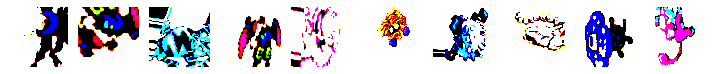

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [247]:
#visualize data (function is from tensorflow's website)
imgs, labels = next(train_batch)

def plotImages(arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,20)) #will only show the first 10 images
    axes = axes.flatten()
    for img, label in zip(arr, axes): 
        label.imshow(img)
        label.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs)
print(labels)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

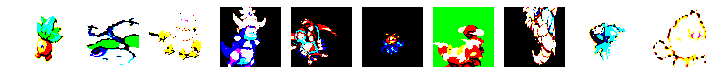

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

In [248]:
#visualize data (function is from tensorflow's website)
imgs2, labels2 = next(train_batch2)

def plotImages(arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,20)) #will only show the first 10 images
    axes = axes.flatten()
    for img, label in zip(arr, axes): 
        label.imshow(img)
        label.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs2)
print(labels2)

In [10]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)),
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.2),
    Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu', padding = 'same'),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.2),
    Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'same'),
    Conv2D(filters = 256, kernel_size = (3,3),activation = 'relu', padding = 'same'),
    Conv2D(filters = 512, kernel_size = (3,3),activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.2),
    Flatten(),
    Dense(units = 18, activation = 'softmax'),
])
#definitely need to extend, feels like data is being overfitted?
#Try AveragePooling2d

In [11]:
#model.summary()

In [12]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy","mean_squared_error"])

In [13]:
model.fit(x=train_batch, steps_per_epoch = 50, epochs = 50, verbose=1)

Epoch 1/50
50/50 [==============================] - 26s 513ms/step - loss: 6.2529 - accuracy: 0.0495 - mean_squared_error: 0.0670
Epoch 2/50
50/50 [==============================] - 26s 528ms/step - loss: 2.8698 - accuracy: 0.0851 - mean_squared_error: 0.0524
Epoch 3/50
50/50 [==============================] - 26s 523ms/step - loss: 2.7252 - accuracy: 0.1600 - mean_squared_error: 0.0511
Epoch 4/50
50/50 [==============================] - 26s 514ms/step - loss: 2.5686 - accuracy: 0.2219 - mean_squared_error: 0.0495
Epoch 5/50
50/50 [==============================] - 26s 515ms/step - loss: 2.3978 - accuracy: 0.2719 - mean_squared_error: 0.0475
Epoch 6/50
50/50 [==============================] - 26s 520ms/step - loss: 2.1434 - accuracy: 0.3567 - mean_squared_error: 0.0439
Epoch 7/50
50/50 [==============================] - 26s 525ms/step - loss: 2.0319 - accuracy: 0.3927 - mean_squared_error: 0.0421
Epoch 8/50
50/50 [==============================] - 27s 544ms/step - loss: 1.9396 - accura

In [14]:
model2 = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)),
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.2),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (3,3), strides = 2),
    Dropout(0.2),
    Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.2),
    Flatten(),
    Dense(units = 19, activation = 'softmax'),
])
#definitely need to extend, feels like data is being overfitted?

In [15]:
model2.compile(optimizer = Adam(learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy","mean_squared_error"])

In [16]:
model2.fit(x=train_batch2, steps_per_epoch = 50, epochs=50, verbose=1)

C:\Users\Brady\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
50/50 [==============================] - 25s 496ms/step - loss: 8.3269 - accuracy: 0.0609 - mean_squared_error: 0.0681
Epoch 2/50
50/50 [==============================] - 25s 496ms/step - loss: 2.9339 - accuracy: 0.0999 - mean_squared_error: 0.0498
Epoch 3/50
50/50 [==============================] - 24s 484ms/step - loss: 2.7017 - accuracy: 0.1707 - mean_squared_error: 0.0475
Epoch 4/50
50/50 [==============================] - 24s 484ms/step - loss: 2.5194 - accuracy: 0.2385 - mean_squared_error: 0.0456
Epoch 5/50
50/50 [==============================] - 25s 494ms/step - loss: 2.2616 - accuracy: 0.3092 - mean_squared_error: 0.0424
Epoch 6/50
50/50 [==============================] - 24s 487ms/step - loss: 2.1313 - accuracy: 0.3688 - mean_squared_error: 0.0403
Epoch 7/50
50/50 [==============================] - 25s 491ms/step - loss: 2.0821 - accuracy: 0.3628 - mean_squared_error: 0.0398
Epoch 8/50
50/50 [==============================] - 24s 484ms/step - loss: 1.8609 - accura

In [17]:
output = model.predict(test_batch)
output

array([[2.7453741e-06, 2.0479540e-07, 1.5696694e-04, ..., 2.5541171e-05,
        4.6845448e-06, 5.2424198e-06],
       [7.2068321e-03, 4.5332959e-04, 2.0980237e-04, ..., 8.5993094e-04,
        1.7207592e-05, 9.2295175e-03],
       [3.6388243e-05, 2.0117938e-08, 4.4771982e-06, ..., 2.2048125e-06,
        9.3832517e-01, 5.7268396e-02],
       ...,
       [1.3652108e-04, 1.5261669e-09, 2.2095049e-02, ..., 2.6251515e-02,
        8.2678431e-05, 8.2123411e-01],
       [2.0272047e-03, 4.0508992e-05, 6.2716559e-02, ..., 3.1099737e-06,
        1.2947156e-05, 3.9038694e-01],
       [2.3642363e-07, 2.0680335e-09, 1.2306012e-07, ..., 2.2649500e-03,
        5.0299775e-08, 9.2705915e-05]], dtype=float32)

In [18]:
output2 = model2.predict(test_batch2)
output2

array([[4.3825600e-01, 1.9972686e-02, 4.7691385e-04, ..., 3.4654749e-05,
        2.9111826e-01, 5.0196482e-05],
       [9.9999642e-01, 8.3326812e-09, 8.9577892e-09, ..., 4.7881787e-09,
        7.9294887e-07, 7.9554155e-11],
       [9.7829312e-01, 1.6374881e-07, 1.3757699e-04, ..., 1.3663778e-02,
        1.7645906e-04, 4.6226605e-06],
       ...,
       [1.9617266e-06, 1.1056164e-05, 1.5125020e-05, ..., 3.1729959e-04,
        2.9732782e-06, 9.3971854e-01],
       [3.3473310e-10, 2.3891703e-04, 2.1510592e-05, ..., 9.9860029e-03,
        2.7552440e-08, 9.8652309e-01],
       [7.7275336e-10, 5.3264182e-07, 1.3281687e-07, ..., 2.6612390e-06,
        3.4025675e-07, 9.9912184e-01]], dtype=float32)

In [19]:
prediction = []
prediction2 = []

In [20]:
def getType(pokemon):
    return np.argmax(pokemon)

In [21]:
for x in range(0,len(output)):
    prediction.append(getType(output[x]))
    
for x in range(0, len(output2)):
    prediction2.append(getType(output2[x]))

In [22]:
def test_accuracy(prediction, real):
    correct = 0
    if len(prediction) != len(real):
        print("Error")
        return 0
    for x in range(0, len(prediction)):
        if prediction[x] == real[x]:
            correct += 1
    print(100 * (correct / len(prediction)))

print("Type 1 accuracy:")
test_accuracy(prediction,test_batch.labels)
print("Type 2 accuracy:")
test_accuracy(prediction2,test_batch2.labels)

Type 1 accuracy:
57.83050847457627
Type 2 accuracy:
70.79463364293086
